In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import nltk
from nltk.stem import WordNetLemmatizer


In [2]:
df = pd.read_csv('reddit_train.csv', index_col=0)

In [3]:
#df.drop('id',1,inplace=True)

In [4]:
df.head()

,comments,subreddits
id,,
0,"Honestly, Buffalo is the correct answer. I rem...",hockey
1,Ah yes way could have been :( remember when he...,nba
2,https://youtu.be/6xxbBR8iSZ0?t=40m49s\n\nIf yo...,leagueoflegends
3,He wouldn't have been a bad signing if we woul...,soccer
4,Easy. You use the piss and dry technique. Let ...,funny


In [5]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 2 columns):
comments      70000 non-null object
subreddits    70000 non-null object
dtypes: object(2)
memory usage: 1.1+ MB


In [6]:
from nltk import WordPunctTokenizer
tok = WordPunctTokenizer()
import re

negations_dict = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}

neg_pattern = re.compile(r'\b(' + '|'.join(negations_dict.keys()) + r')\b')
neg_pattern

re.compile(r"\b(isn't|aren't|wasn't|weren't|haven't|hasn't|hadn't|won't|wouldn't|don't|doesn't|didn't|can't|couldn't|shouldn't|mightn't|mustn't)\b",
re.UNICODE)

In [7]:
def comment_cleaner(text):
    letters = re.sub("[^a-zA-Z]"," ",str(text))
    lower_case = letters.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dict[x.group()],lower_case)
    
    #remove unnecessary white spaces by tokenizing and joining back
    words = tok.tokenize(neg_handled)
    return (" ".join(words)).strip() 

In [8]:
%%time
print("Cleaning and parsing  comments")
clean_comments = []
for x in df['comments']:
    clean_comments.append(comment_cleaner(x))

Cleaning and parsing  comments
Wall time: 4.43 s


In [9]:
len(clean_comments)
print(clean_comments)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
df['clean-comments'] = clean_comments

In [11]:
df.head()

,comments,subreddits,clean-comments
0,"Honestly, Buffalo is the correct answer. I rem...",hockey,honestly buffalo is the correct answer i remem...
1,Ah yes way could have been :( remember when he...,nba,ah yes way could have been remember when he wa...
2,https://youtu.be/6xxbBR8iSZ0?t=40m49s\n\nIf yo...,leagueoflegends,https youtu be xxbbr isz t m s if you didn t f...
3,He wouldn't have been a bad signing if we woul...,soccer,he wouldn t have been a bad signing if we woul...
4,Easy. You use the piss and dry technique. Let ...,funny,easy you use the piss and dry technique let a ...


In [12]:
df.drop('comments',1,inplace=True)

In [13]:
df.head()

,subreddits,clean-comments
0,hockey,honestly buffalo is the correct answer i remem...
1,nba,ah yes way could have been remember when he wa...
2,leagueoflegends,https youtu be xxbbr isz t m s if you didn t f...
3,soccer,he wouldn t have been a bad signing if we woul...
4,funny,easy you use the piss and dry technique let a ...


In [14]:
df['subreddit-id'] = df['subreddits'].factorize()[0]

In [15]:
df.head()

,subreddits,clean-comments,subreddit-id
0,hockey,honestly buffalo is the correct answer i remem...,0
1,nba,ah yes way could have been remember when he wa...,1
2,leagueoflegends,https youtu be xxbbr isz t m s if you didn t f...,2
3,soccer,he wouldn t have been a bad signing if we woul...,3
4,funny,easy you use the piss and dry technique let a ...,4


In [16]:
df.rename(columns={'clean-comments':'comments'},inplace=True)

In [30]:
df.head()

,subreddit-id,subreddits,comments
0,0,hockey,honestly buffalo is the correct answer i remem...
1,1,nba,ah yes way could have been remember when he wa...
2,2,leagueoflegends,https youtu be xxbbr isz t m s if you didn t f...
3,3,soccer,he wouldn t have been a bad signing if we woul...
4,4,funny,easy you use the piss and dry technique let a ...


In [17]:
subreddit_id_df = df[['subreddits','subreddit-id']].drop_duplicates().sort_values('subreddit-id')

In [18]:
subreddit_id_df.head()

,subreddits,subreddit-id
0,hockey,0
1,nba,1
2,leagueoflegends,2
3,soccer,3
4,funny,4


In [19]:
subreddit_to_id = dict(subreddit_id_df.values)
subreddit_to_id

{'hockey': 0,
 'nba': 1,
 'leagueoflegends': 2,
 'soccer': 3,
 'funny': 4,
 'movies': 5,
 'anime': 6,
 'Overwatch': 7,
 'trees': 8,
 'GlobalOffensive': 9,
 'nfl': 10,
 'AskReddit': 11,
 'gameofthrones': 12,
 'conspiracy': 13,
 'worldnews': 14,
 'wow': 15,
 'europe': 16,
 'canada': 17,
 'Music': 18,
 'baseball': 19}

In [28]:
df.head()

,subreddit-id,subreddits,comments
0,0,hockey,honestly buffalo is the correct answer i remem...
1,1,nba,ah yes way could have been remember when he wa...
2,2,leagueoflegends,https youtu be xxbbr isz t m s if you didn t f...
3,3,soccer,he wouldn t have been a bad signing if we woul...
4,4,funny,easy you use the piss and dry technique let a ...


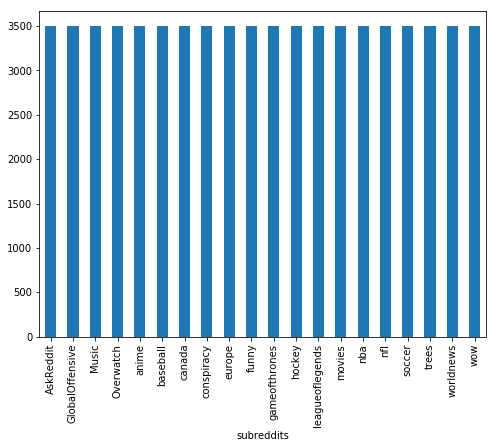

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,6))
df.groupby('subreddits').comments.count().plot.bar(ylim=0)
plt.show()

In [21]:
df.head()

,subreddits,comments,subreddit-id
0,hockey,honestly buffalo is the correct answer i remem...,0
1,nba,ah yes way could have been remember when he wa...,1
2,leagueoflegends,https youtu be xxbbr isz t m s if you didn t f...,2
3,soccer,he wouldn t have been a bad signing if we woul...,3
4,funny,easy you use the piss and dry technique let a ...,4


In [22]:
df = df[['subreddit-id','subreddits','comments']]

In [23]:
df.head()

,subreddit-id,subreddits,comments
0,0,hockey,honestly buffalo is the correct answer i remem...
1,1,nba,ah yes way could have been remember when he wa...
2,2,leagueoflegends,https youtu be xxbbr isz t m s if you didn t f...
3,3,soccer,he wouldn t have been a bad signing if we woul...
4,4,funny,easy you use the piss and dry technique let a ...


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
print(vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [31]:
labels = df['subreddit-id']
print(labels)

0         0
1         1
2         2
3         3
4         4
         ..
69995    16
69996     2
69997    17
69998     6
69999     9
Name: subreddit-id, Length: 70000, dtype: int64


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['comments'], df['subreddits'], train_size=0.8, test_size=0.2)

In [33]:
len(X_train)

56000

In [34]:
vectors_train = vectorizer.fit_transform(X_train)

In [35]:
vectors_test = vectorizer.transform(X_test)

In [36]:
print(vectorizer.vocabulary_)

{'it': 27044, 'was': 58191, 'the': 53208, 'spooky': 50102, 'ghost': 21314, 'http': 24722, 'media': 32707, 'tumblr': 55109, 'com': 9843, 'abd': 79, 'de': 12484, 'bd': 4399, 'njmh': 35967, 'etw': 17312, 'rlo': 45096, 'jpg': 27797, 'edit': 15932, 'majher': 31631, 'beat': 4464, 'me': 32634, 'to': 53928, 'get': 21230, 'am': 1538, 'gonna': 21816, 'leave': 29857, 'though': 53494, 'maybe': 32414, 'if': 25231, 'your': 60244, 'club': 9490, 'spent': 49929, 'money': 34095, 'you': 60213, 'wouldn': 59482, 'be': 4416, 'shit': 47864, 'hi': 23903, 'thank': 53176, 'for': 19629, 'contribution': 10768, 'but': 7101, 'this': 53442, 'submission': 51319, 'has': 23265, 'been': 4549, 'removed': 44033, 'because': 4506, 'is': 26944, 'not': 36247, 'on': 37157, 'topic': 54123, 'subreddit': 51340, 'see': 46964, 'community': 10028, 'rules': 45647, 'amp': 1684, 'guidelines': 22558, 'europe': 17359, 'wiki': 58950, 'have': 23345, 'any': 2140, 'questions': 42439, 'about': 151, 'removal': 44031, 'please': 40133, 'contact'

In [37]:
vectors_test.shape

(14000, 60816)

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()
X_train_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_idf = tf_idf_vectorizer.transform(X_test)
print(X_train[1:2])

47941    maybe if your club spent money you wouldn t be...
Name: comments, dtype: object


In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
clf = MultinomialNB().fit(X_train_idf, y_train)

In [65]:
print(X_test_idf)

  (0, 60213)	0.2135438567443508
  (0, 59480)	0.15844577353753259
  (0, 58663)	0.1559256601766359
  (0, 53928)	0.16521095791409246
  (0, 51803)	0.31336258204236817
  (0, 37459)	0.29415743604977945
  (0, 27215)	0.3742949332113704
  (0, 25231)	0.2641496658406656
  (0, 24083)	0.1711525261347494
  (0, 23428)	0.2800913421257288
  (0, 23265)	0.16611607391101677
  (0, 21674)	0.1993626714768693
  (0, 13757)	0.20716589934225008
  (0, 13750)	0.20199164027772115
  (0, 7678)	0.3162652205974759
  (0, 4416)	0.12745118716525727
  (0, 1810)	0.0877710457527684
  (0, 1457)	0.24131393897340134
  (0, 860)	0.20514303540720807
  (1, 60213)	0.11191029671901216
  (1, 58527)	0.19993564468034664
  (1, 58191)	0.13375650865749739
  (1, 54120)	0.24847503914610447
  (1, 49103)	0.4476592664325917
  (1, 40314)	0.227747259720423
  :	:
  (13999, 59461)	0.19752518806951652
  (13999, 58086)	0.1971390795162495
  (13999, 57767)	0.2501816152796464
  (13999, 57375)	0.21937045040212297
  (13999, 53928)	0.056554094444228584
  (

In [66]:
y_pred = clf.predict(X_test_idf) 
y_pred

array(['canada', 'Overwatch', 'europe', ..., 'gameofthrones', 'nfl',
       'Music'], dtype='<U15')

In [67]:
from sklearn import metrics

In [68]:
metrics.accuracy_score(y_test, y_pred)

0.5539285714285714

In [56]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1,2), stop_words='english')

In [57]:
#features = tfidf.fit_transform(df['comments']).toarray()

In [58]:
#features

In [59]:

features.shape

NameError: name 'features' is not defined

In [60]:
#labels

In [61]:
#test_df = pd.read_csv('./data/reddit_test.csv',index_col=0)

In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.naive_bayes import BernoulliNB

#X_train, X_test, y_train, y_test = train_test_split(df['comments'], df['subreddits'], random_state = 0)

In [ ]:
#count_vect = CountVectorizer()
#X_train_counts = count_vect.fit_transform(X_train)
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#clf = BernoulliNB().fit(X_train_tfidf, y_train)